In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
df = pd.read_csv("Walmart_Sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [13]:
df_by_holiday = df.groupby(["Holiday_Flag"])["Weekly_Sales"].agg(["sum"])
df_by_holiday

,sum
Holiday_Flag,
0,6.231919e+09
1,5.052996e+08


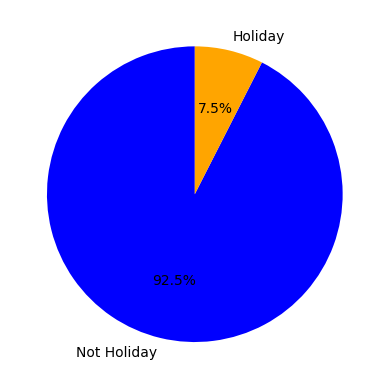

In [38]:
plt.pie([df_by_holiday.iloc[0,0], df_by_holiday.iloc[1,0]], labels=["Not Holiday", "Holiday"], colors=["blue", "orange"], 
        autopct="%1.1f%%", startangle=90);

In [50]:
df.groupby(["Store"])["Weekly_Sales"].agg(["mean"]).sort_values(by = "mean", ascending=False)

,mean
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


In [53]:
df[df["Store"]==20].shape

(143, 8)

In [54]:
df[df["Store"]==33].shape

(143, 8)

In [55]:
s20 = df[df["Store"]==20].sample(n=50, replace=True)
s33 = df[df["Store"]==33].sample(n=50, replace=True)

# store 20 sample

In [59]:
s20_mean = s20["Weekly_Sales"].mean()
s20_std = s20["Weekly_Sales"].std()
s20_stderr = s20_std/(np.sqrt(s20.shape[0]))
sp.stats.norm.interval(0.95, s20_mean, s20_stderr)

(2064561.576601185, 2201233.368598815)

# store 33 sample

In [60]:
s33_mean = s33["Weekly_Sales"].mean()
s33_std = s33["Weekly_Sales"].std()
s33_stderr = s33_std/(np.sqrt(s33.shape[0]))
sp.stats.norm.interval(0.95, s33_mean, s33_stderr)

(246406.10530975446, 260135.7082902456)

# hypothesis testing

### H0 = the mean weekly sales of state 20 and state 30 is same
### Ha = the mean weekly sales of s20 is more than s30

In [62]:
sp.stats.ttest_ind(a=s20["Weekly_Sales"], b=s33["Weekly_Sales"], equal_var=False)

TtestResult(statistic=53.640201658178576, pvalue=7.482768870725176e-46, df=49.98887188582648)

## Conclusion: H0 is rejected

<Axes: xlabel='Weekly_Sales'>

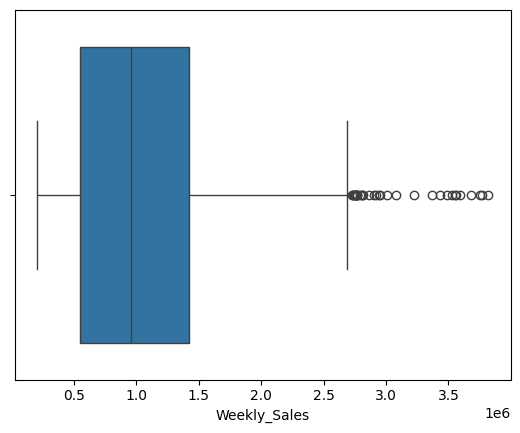

In [63]:
sns.boxplot(x="Weekly_Sales", data=df)

In [65]:
q1 = df["Weekly_Sales"].quantile(0.25)
q3 = df["Weekly_Sales"].quantile(0.75)
iqr = q3-q1
med = df["Weekly_Sales"].median()
low = med - (1.5*iqr)
high = med + (1.5*iqr)

In [67]:
outliers = df[df["Weekly_Sales"]>high]
outliers

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838
98,1,2011-12-23,2270188.99,0,47.96,3.112,219.357722,7.866
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163
187,2,2010-12-10,2378726.55,0,45.50,2.843,211.124799,8.163
188,2,2010-12-17,2609166.75,0,47.55,2.869,211.064546,8.163
...,...,...,...,...,...,...,...,...
3816,27,2011-12-23,2739019.75,0,41.59,3.587,140.528765,7.906
5480,39,2010-12-24,2495489.25,0,58.86,2.886,210.180560,8.476
5528,39,2011-11-25,2338832.40,1,66.36,3.236,217.181253,7.716
5532,39,2011-12-23,2554482.84,0,54.62,3.112,218.054185,7.716


In [68]:
df_new = df[df["Weekly_Sales"]<high]

<Axes: xlabel='Weekly_Sales'>

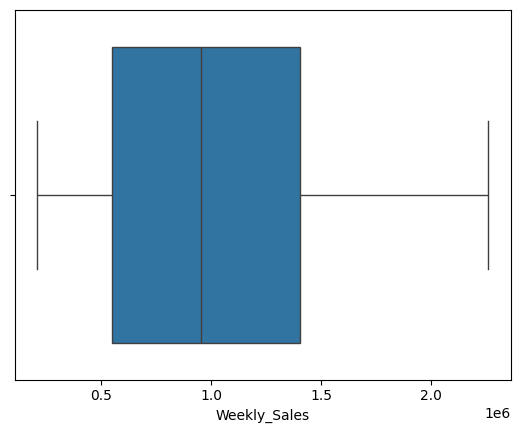

In [69]:
sns.boxplot(x="Weekly_Sales", data=df_new)